In [53]:
import pandas as pd
import numpy as np

In [54]:
nnn = pd.read_csv("student-mat.csv", sep = ';')

In [82]:
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,AQI_Level
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Wyoming,Sublette,2023,211,92,113,6,0,0,0,122,84,54,0,0,209,2,0,1
945,Wyoming,Sweetwater,2023,212,125,78,8,0,1,0,211,87,49,0,0,170,33,9,0
946,Wyoming,Teton,2023,244,203,41,0,0,0,0,74,54,46,1,0,240,3,0,0
947,Wyoming,Uinta,2023,181,181,0,0,0,0,0,32,12,6,0,0,0,0,181,0


In [56]:
#загружаем данные из csv файла в dataframe
df = pd.read_csv('annual_aqi_by_county_2023.csv')

In [57]:
# выводим df для просмотра данных
df 

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Wyoming,Sublette,2023,211,92,113,6,0,0,0,122,84,54,0,0,209,2,0
945,Wyoming,Sweetwater,2023,212,125,78,8,0,1,0,211,87,49,0,0,170,33,9
946,Wyoming,Teton,2023,244,203,41,0,0,0,0,74,54,46,1,0,240,3,0
947,Wyoming,Uinta,2023,181,181,0,0,0,0,0,32,12,6,0,0,0,0,181


In [58]:
# считаем количество пропущенных значений в каждом столбце (их нет)
df.isnull().sum()

State                                  0
County                                 0
Year                                   0
Days with AQI                          0
Good Days                              0
Moderate Days                          0
Unhealthy for Sensitive Groups Days    0
Unhealthy Days                         0
Very Unhealthy Days                    0
Hazardous Days                         0
Max AQI                                0
90th Percentile AQI                    0
Median AQI                             0
Days CO                                0
Days NO2                               0
Days Ozone                             0
Days PM2.5                             0
Days PM10                              0
dtype: int64

In [59]:
# функция для классификации уровней aqi
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100: #в итоге использовались только Good и Moderate
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

#применяем функцию для создания нового столбца
df['AQI_Level'] = df['Median AQI'].apply(classify_aqi)



In [60]:
#выводим уникальные значения в столбце 'AQI_Level'
df['AQI_Level'].unique()

array(['Good', 'Moderate'], dtype=object)

In [61]:
df['Median AQI']

0      40
1      40
2      43
3      40
4      43
       ..
944    54
945    49
946    46
947     6
948    44
Name: Median AQI, Length: 949, dtype: int64

In [62]:
from sklearn.preprocessing import LabelEncoder
# преобразуем текст в числовые значения
le = LabelEncoder()
df['AQI_Level'] = le.fit_transform(df['AQI_Level'])


In [63]:
df['AQI_Level'].unique()
# выводим уникальные числовые значения в столбцеAQI_Level

array([0, 1])

In [64]:
# создаем dummy для столбца 'State' ведь значений в стобце много и они не цифры

In [65]:
df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10,AQI_Level
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Wyoming,Sublette,2023,211,92,113,6,0,0,0,122,84,54,0,0,209,2,0,1
945,Wyoming,Sweetwater,2023,212,125,78,8,0,1,0,211,87,49,0,0,170,33,9,0
946,Wyoming,Teton,2023,244,203,41,0,0,0,0,74,54,46,1,0,240,3,0,0
947,Wyoming,Uinta,2023,181,181,0,0,0,0,0,32,12,6,0,0,0,0,181,0


In [66]:
features = [
    'Days with AQI', 'Good Days', 'Moderate Days',
    'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
    'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
    '90th Percentile AQI', 'Median AQI', 'Days CO',
    'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'
]
#в features я выбрад столюцы которые я булу испольщровать в предсказывании, pipline не использовал так как значентя только
#цифровые и только 2 столбца взял dummies

X = df[features].values     #подготовка к tain twest split
y = df['AQI_Level'].values  #сохраняю y отденльно

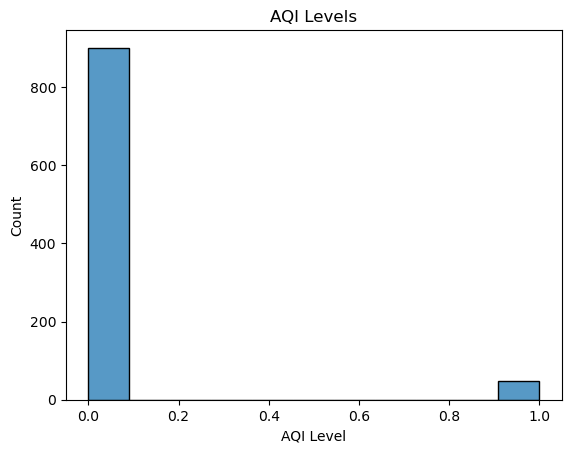

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

#  График который показхывает соотношение 1го и 0я 
sns.histplot(df['AQI_Level'], kde=False)
plt.title('AQI Levels')
plt.xlabel('AQI Level')
plt.ylabel('Count')
plt.show()



In [68]:
#разделяем данные на обучающий и тестовый наборы
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [69]:
 # импортируем классификаторы 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [70]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)

In [71]:
#фитим
knn.fit(X_train, y_train)
rf.fit(X_train, y_train)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [76]:
from sklearn.metrics import classification_report

# Predictions
y_pred_knn = knn.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

# Classification reports
print('KNN')
print(classification_report(y_test, y_pred_knn))
print('')
print('')
print('')
print('')


print('Random Forest ')
print(classification_report(y_test, y_pred_rf))
print('')
print('')
print('')
print('')

print('Gradient Boosting')
print(classification_report(y_test, y_pred_gb))
#нашел библеотеку которая сразу выводит скор f1 recall и precision. Лучшии модели это Random Forest,Gradient Boosting

KNN
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       179
           1       0.75      0.55      0.63        11

    accuracy                           0.96       190
   macro avg       0.86      0.77      0.81       190
weighted avg       0.96      0.96      0.96       190





Random Forest 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        11

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190





Gradient Boosting
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        11

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      

In [77]:
from sklearn.model_selection import GridSearchCV

In [26]:
list_n_estimators = [10, 30, 50, 70, 100, 120, 150, 200, 300]  # список значений числа деревьев в ансамбле
list_max_depth = [1, 2, 4, 6, 8, 10, 13, 17, 20, None]  #список значений максимальной глубины деревьев
list_min_samples_split = [2, 3, 5, 7, 9, 11, 15]  #список значений минимального количества образцов, необходимых для разделения внутреннего узла


In [27]:
grid = {'n_estimators': list_n_estimators,
        'max_depth': list_max_depth,
        'min_samples_split': list_min_samples_split}# словарь параметров для поиска по сетке

In [28]:
model = RandomForestClassifier(random_state = 1)

In [29]:
search = GridSearchCV(estimator = model,
                      param_grid = grid,
                      n_jobs = -1,
                      cv = 3,
                     error_score='raise')# создаем экземпляр объекта GridSearchCV для поиска по сетке

In [30]:
%%time
search.fit(X_train, y_train)

CPU times: total: 3.7 s
Wall time: 47.6 s


GridSearchCV(cv=3, error_score='raise',
             estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [1, 2, 4, 6, 8, 10, 13, 17, 20, None],
                         'min_samples_split': [2, 3, 5, 7, 9, 11, 15],
                         'n_estimators': [10, 30, 50, 70, 100, 120, 150, 200,
                                          300]})

In [31]:
search.best_params_

{'max_depth': 6, 'min_samples_split': 5, 'n_estimators': 100}

In [78]:
best_rf = RandomForestClassifier(max_depth= 6, min_samples_split= 5, n_estimators= 100, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)
print('Best Random Forest Classification')
print(classification_report(y_test, y_pred_best_rf)) #score не ихменился так как accuracy было 100%, я селал что бы вы зналт что я умею и не сняли балы)

Best Random Forest Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        11

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



In [79]:
best_gb = GradientBoostingClassifier(max_depth= 6, min_samples_split= 5, n_estimators= 100, random_state=42)
best_gb.fit(X_train, y_train)
y_pred_best_gb = best_gb.predict(X_test)
print('Best Gradient Boosting Classification')
print(classification_report(y_test, y_pred_best_gb))

Best Gradient Boosting Classification
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       179
           1       1.00      1.00      1.00        11

    accuracy                           1.00       190
   macro avg       1.00      1.00      1.00       190
weighted avg       1.00      1.00      1.00       190



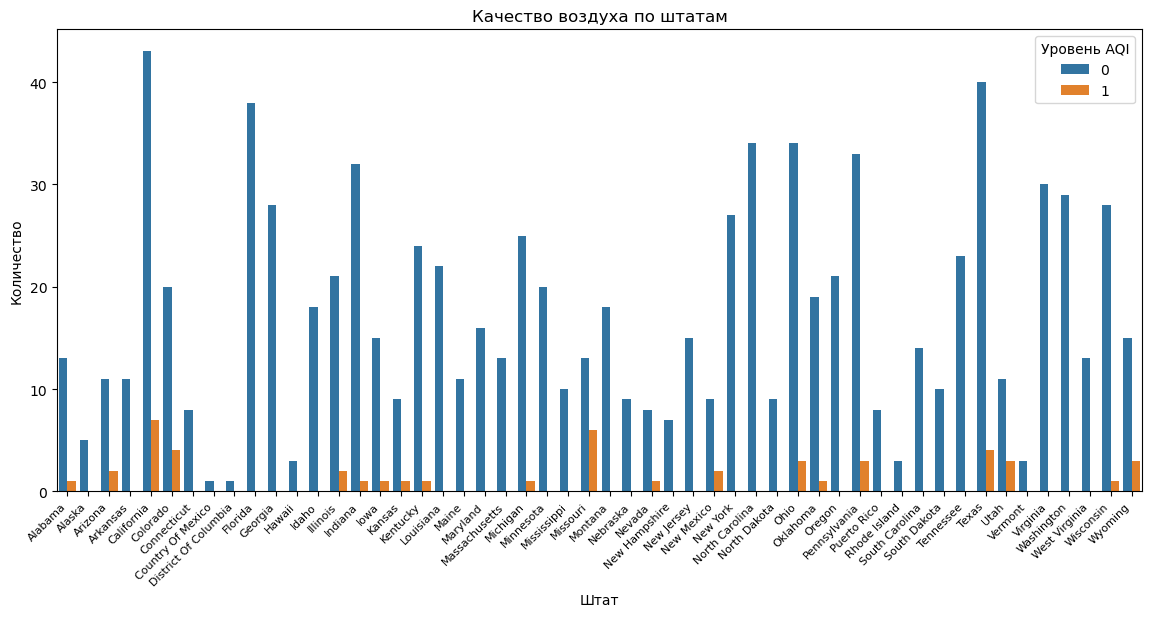

In [81]:
# Создание барплота
plt.figure(figsize=(14, 6))  # Увеличиваем размер графика
sns.countplot(data=df, x='State', hue='AQI_Level')
plt.title('Качество воздуха по штатам')
plt.xlabel('Штат')
plt.ylabel('Количество')
plt.legend(title='Уровень AQI')
plt.xticks(rotation=45)

# Устанавливаем интервал между метками на оси x
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=45, ha='right', fontsize=8)

plt.show()


###
END

In [47]:
df_norm = pd.read_csv('annual_aqi_by_county_2023.csv')

In [52]:
df_norm

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Baldwin,2023,170,143,27,0,0,0,0,90,54,40,0,0,84,86,0
1,Alabama,Clay,2023,155,109,46,0,0,0,0,83,61,40,0,0,0,155,0
2,Alabama,DeKalb,2023,212,155,55,2,0,0,0,133,63,43,0,0,141,71,0
3,Alabama,Elmore,2023,118,102,16,0,0,0,0,90,54,40,0,0,118,0,0
4,Alabama,Etowah,2023,181,126,55,0,0,0,0,100,64,43,0,0,74,107,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944,Wyoming,Sublette,2023,211,92,113,6,0,0,0,122,84,54,0,0,209,2,0
945,Wyoming,Sweetwater,2023,212,125,78,8,0,1,0,211,87,49,0,0,170,33,9
946,Wyoming,Teton,2023,244,203,41,0,0,0,0,74,54,46,1,0,240,3,0
947,Wyoming,Uinta,2023,181,181,0,0,0,0,0,32,12,6,0,0,0,0,181


In [86]:
old_df = pd.read_csv('annual_aqi_by_county_1984.csv')
old_df

,State,County,Year,Days with AQI,Good Days,Moderate Days,Unhealthy for Sensitive Groups Days,Unhealthy Days,Very Unhealthy Days,Hazardous Days,Max AQI,90th Percentile AQI,Median AQI,Days CO,Days NO2,Days Ozone,Days PM2.5,Days PM10
0,Alabama,Cullman,1984,260,175,47,32,6,0,0,190,115,44,0,0,260,0,0
1,Alabama,Etowah,1984,259,146,70,31,11,1,0,204,122,47,0,0,259,0,0
2,Alabama,Jefferson,1984,366,219,125,19,3,0,0,174,89,45,176,0,190,0,0
3,Alabama,Mobile,1984,274,189,56,22,7,0,0,177,105,44,0,0,274,0,0
4,Alaska,Anchorage,1984,366,202,124,28,4,8,0,213,108,45,347,0,19,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,Wisconsin,Vernon,1984,358,358,0,0,0,0,0,42,20,9,0,358,0,0,0
476,Wisconsin,Washington,1984,172,132,31,8,1,0,0,164,84,38,0,0,172,0,0
477,Wisconsin,Waukesha,1984,365,300,54,10,1,0,0,174,64,31,201,0,164,0,0
478,Wisconsin,Winnebago,1984,155,127,23,4,1,0,0,172,77,41,0,0,155,0,0


In [92]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report



# Assuming the preprocessing steps are similar to what was done for the 2024 data
# функция для классификации уровней aqi
def classify_aqi(aqi):
    if aqi <= 50:
        return 'Good'
    elif 51 <= aqi <= 100: #в итоге использовались только Good и Moderate
        return 'Moderate'
    elif 101 <= aqi <= 150:
        return 'Unhealthy for Sensitive Groups'
    elif 151 <= aqi <= 200:
        return 'Unhealthy'
    elif 201 <= aqi <= 300:
        return 'Very Unhealthy'
    else:
        return 'Hazardous'

#применяем функцию для создания нового столбца
old_df['AQI_Level'] = old_df['Median AQI'].apply(classify_aqi)

from sklearn.preprocessing import LabelEncoder
# преобразуем текст в числовые значения
le = LabelEncoder()
old_df['AQI_Level'] = le.fit_transform(old_df['AQI_Level'])

# Features used in the model
features = [
    'Days with AQI', 'Good Days', 'Moderate Days',
    'Unhealthy for Sensitive Groups Days', 'Unhealthy Days',
    'Very Unhealthy Days', 'Hazardous Days', 'Max AQI',
    '90th Percentile AQI', 'Median AQI', 'Days CO',
    'Days NO2', 'Days Ozone', 'Days PM2.5', 'Days PM10'
]

# Select features from the 1984 data
X_old = old_df[features].values

# Apply any necessary preprocessing (e.g., scaling)
# Assuming StandardScaler was used for the 2024 data
scaler = StandardScaler()
X_old_scaled = scaler.fit_transform(X_old)

# Use the trained KNN model to make predictions
y_old_pred_knn = knn.predict(X_old_scaled)

# If you also want to use Random Forest and Gradient Boosting models
y_old_pred_rf = rf.predict(X_old_scaled)
y_old_pred_gb = gb.predict(X_old_scaled)




y_old_true = old_df['AQI_Level'].values

# KNN evaluation
print("KNN Classification Report for 1984 Data:")
print(classification_report(y_old_true, y_old_pred_knn))

# Random Forest evaluation
print("Random Forest Classification Report for 1984 Data:")
print(classification_report(y_old_true, y_old_pred_rf))

# Gradient Boosting evaluation
print("Gradient Boosting Classification Report for 1984 Data:")
print(classification_report(y_old_true, y_old_pred_gb))


KNN Classification Report for 1984 Data:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       415
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3

    accuracy                           0.86       480
   macro avg       0.22      0.25      0.23       480
weighted avg       0.75      0.86      0.80       480

Random Forest Classification Report for 1984 Data:
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       415
           1       0.00      0.00      0.00        61
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3

    accuracy                           0.86       480
   macro avg       0.22      0.25      0.23       480
weighted avg       0.75      0.86      0.80       480

Gradient Boosting Classification Repor

C:\Users\Almaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Almaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Almaz\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Almaz\anaconda3\Lib\site-packages\sklearn\metr

In [96]:
value_counts = old_df['AQI_Level'].value_counts()
print(value_counts)


0    415
1     61
3      3
2      1
Name: AQI_Level, dtype: int64
